In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
data = pd.read_excel(r'BodyFat.xls')
#print(data)


In [3]:
#removing the idno as it is of no use
data_woid = data.drop(labels='IDNO',axis=1)

#number of rows m
m=data_woid.shape[0]
#number of columns n
n=data_woid.shape[1]

In [4]:
#print(data_woid.iloc[0])
#now find mean of each column
data_transpose=data_woid.transpose()
ones = pd.Series(1,index = range(0,252))
data_mean = data_transpose.dot(ones)/m

In [5]:
#print the mean just to check
#print(data_mean)

In [6]:
#now subtract the respective means from every row
data_star = data_woid.sub(data_mean,axis=1)
#print(data_star)

In [7]:
data_star_transpose = data_star.transpose()
#print(data_star_transpose)

In [8]:
#a) part 1 now calculate the covariance matrix
data_cov_mat = data_star_transpose.dot(data_star)/(m-1)
print(data_cov_mat)

              BODYFAT   DENSITY         AGE      WEIGHT     HEIGHT  ADIPOSITY  \
BODYFAT     60.075763 -0.145753   28.245483  139.671527  -2.529755  20.584749   
DENSITY     -0.145753  0.000362   -0.066587   -0.332269   0.006823  -0.049623   
AGE         28.245483 -0.066587  158.811405   -4.720686  -7.923046   5.464025   
WEIGHT     139.671527 -0.332269   -4.720686  863.722719  33.185647  95.137383   
HEIGHT      -2.529755  0.006823   -7.923046   33.185647  13.416513  -0.332605   
ADIPOSITY   20.584749 -0.049623    5.464025   95.137383  -0.332605  13.308712   
NECK         9.260466 -0.021881    3.477171   59.348441   2.259054   6.898222   
CHEST       45.928905 -0.109519   18.746223  221.548750   4.165407  28.042649   
ABDOMEN     68.007997 -0.163959   31.310050  281.410541   3.468334  36.343465   
HIP         34.743601 -0.083078   -4.544071  198.099047   4.471301  23.084485   
THIGH       22.839571 -0.055262  -13.238356  134.032185   2.854390  15.565277   
KNEE         9.492320 -0.022

In [9]:
#print(data_cov_mat.iat[0,0])

In [10]:
#now get the data star tilde to calculate correlation matrix

data_star_tilde = data_star
data_variance = []
#get the variance
for i in range(0,n):
    data_variance.append(math.sqrt(data_cov_mat.iat[i,i]))

data_star_tilde = data_star_tilde.div(data_variance,axis=1 )

data_star_tilde_transpose = data_star_tilde.transpose()

#calculate correlation matrix
data_cor_mat = data_star_tilde_transpose.dot(data_star_tilde)/(m-1)

print(data_cor_mat)


            BODYFAT   DENSITY       AGE    WEIGHT    HEIGHT  ADIPOSITY  \
BODYFAT    1.000000 -0.988087  0.289174  0.613156 -0.089106   0.727994   
DENSITY   -0.988087  1.000000 -0.277637 -0.594062  0.097881  -0.714732   
AGE        0.289174 -0.277637  1.000000 -0.012746 -0.171645   0.118851   
WEIGHT     0.613156 -0.594062 -0.012746  1.000000  0.308279   0.887352   
HEIGHT    -0.089106  0.097881 -0.171645  0.308279  1.000000  -0.024891   
ADIPOSITY  0.727994 -0.714732  0.118851  0.887352 -0.024891   1.000000   
NECK       0.491489 -0.472966  0.113505  0.830716  0.253710   0.777857   
CHEST      0.702885 -0.682599  0.176450  0.894191  0.134892   0.911799   
ABDOMEN    0.813706 -0.798955  0.230409  0.887995  0.087813   0.923880   
HIP        0.625700 -0.609331 -0.050332  0.940884  0.170394   0.883269   
THIGH      0.561284 -0.553091 -0.200096  0.868694  0.148436   0.812706   
KNEE       0.507786 -0.495040  0.017516  0.853167  0.286053   0.713660   
ANKLE      0.266783 -0.264890 -0.10505

In [11]:
from matplotlib import pyplot as plt
import numpy as np

U,s,Vt = np.linalg.svd(data_woid)
s = s.reshape(s.shape[0],1)
print(s.shape)

(16, 1)


Text(0, 0.5, 'strength_of_concepts')

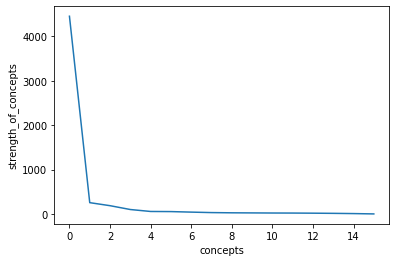

In [12]:
plt.plot(s)
plt.xlabel('concepts')
plt.ylabel('strength_of_concepts')


In [13]:
#select number of dimensions based on energy

energy = sum(map(lambda x:x*x,s))
#print(energy)
temp_energy=0

for i in range(0,s.shape[0]):
    temp_energy+= sum(map(lambda x:x*x,s[i]))
    p = (temp_energy/energy)*100
    if(p>99):
        break
num_princi_comp = i+1
#print(num_princi_comp)
#print(p)
#print(temp_energy)

Only one concept/dimension is enough since we have more than 99% energy
This result also concurs with that of the graph

In [17]:
#b) construction of new data matrix using the dimension
approx_data_matrix = U[:,[0]].dot(s[0,0]*(Vt[[0],:]))
print(approx_data_matrix[0:5,:])

[[ 17.30939084   0.93510033  39.92663396 161.51933392  62.31677786
   22.88616875  33.89615897  90.18952963  83.07220998  89.26918459
   53.12857681  34.4278222   20.58827594  28.85920903  25.5463024
   16.23628228]
 [ 18.28819732   0.98797811  42.18439385 170.65288304  65.8406492
   24.18032928  35.81290928  95.28954137  87.76975356  94.31715292
   56.13287639  36.37463685  21.75249588  30.49113133  26.9908874
   17.15440693]
 [ 17.5420577    0.94766962  40.46331401 163.69042111  63.1544185
   23.19379674  34.35177945  91.40182619  84.18883798  90.46911019
   53.84271282  34.89058911  20.86501645  29.24712456  25.88968698
   16.45452479]
 [ 19.24253808   1.03953419  44.38571996 179.55813482  69.27643973
   25.44214166  37.68174951 100.26207593  92.34987984  99.23894492
   59.06208208  38.27278995  22.8876156   32.08226297  28.39936433
   18.04958263]
 [ 19.53811683   1.05550216  45.06751545 182.3162725   70.34057396
   25.83295063  38.26056736 101.80217106  93.76843815 100.76332404
  

In [18]:
print(data_woid.iloc[0:5])

   BODYFAT  DENSITY  AGE  WEIGHT  HEIGHT  ADIPOSITY  NECK  CHEST  ABDOMEN  \
0     12.6   1.0708   23  154.25   67.75       23.7  36.2   93.1     85.2   
1      6.9   1.0853   22  173.25   72.25       23.4  38.5   93.6     83.0   
2     24.6   1.0414   22  154.00   66.25       24.7  34.0   95.8     87.9   
3     10.9   1.0751   26  184.75   72.25       24.9  37.4  101.8     86.4   
4     27.8   1.0340   24  184.25   71.25       25.6  34.4   97.3    100.0   

     HIP  THIGH  KNEE  ANKLE  BICEPS  FOREARM  WRIST  
0   94.5   59.0  37.3   21.9    32.0     27.4   17.1  
1   98.7   58.7  37.3   23.4    30.5     28.9   18.2  
2   99.2   59.6  38.9   24.0    28.8     25.2   16.6  
3  101.2   60.1  37.3   22.8    32.4     29.4   18.2  
4  101.9   63.2  42.2   24.0    32.2     27.7   17.7  


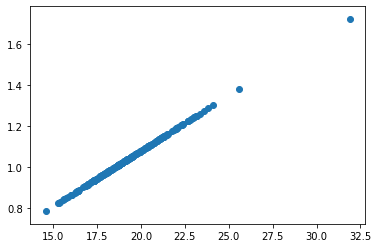

In [19]:
#c) plotting the approximated data matrix along first two dimesnsions

plt.scatter(approx_data_matrix[:,0],approx_data_matrix[:,1])

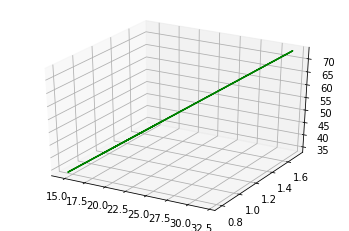

In [20]:
# plotting the approximated data matrix along first three dimesnsions
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

xdata = approx_data_matrix[:,0]
ydata = approx_data_matrix[:,1]
zdata = approx_data_matrix[:,2]
ax.plot3D(xdata, ydata, zdata, 'green')